In this notebook, I will compare two different classifaction models with respect to their performance when used on the Iris Dataset. The two classifcation models are SVM and Random Forest.

First, we will use SVM.

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# X,y = datasets.load_iris(return_X_y=True)

Standard deviation of accuracy over the 5 folds: 0.02108185106778919


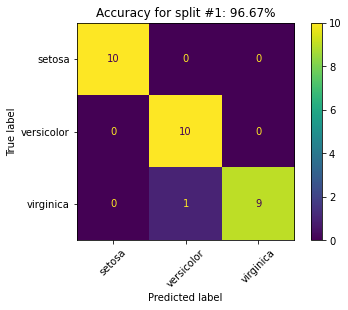

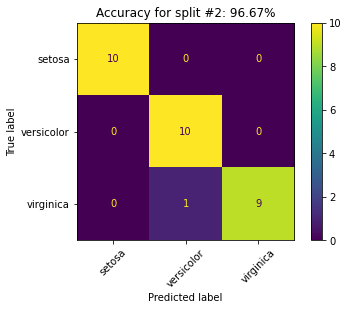

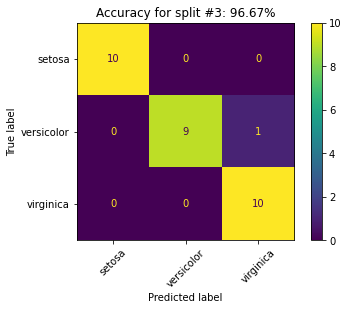

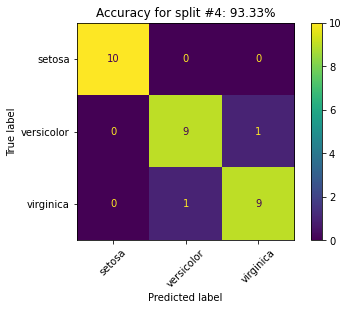

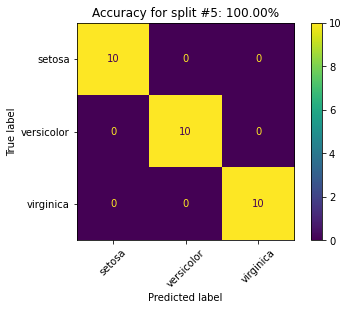

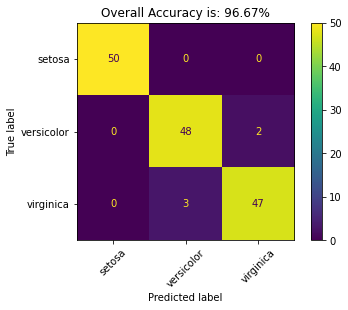

In [4]:
# load dataset and define Data/Target variables and class names
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# define the number of splits
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# define the classifier we are using
clf = svm.SVC()

# This accuracy list will allow us to compute the overall accuracy,
# as well as keep track of the accuracy of each fold
accuracy_list = []

# initialize the overall confusion matrix to zero matrix with 
# dimensions of 3x3
overall_cm = np.zeros((3, 3))
currentSplit = 0

# partition the data into 5 splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train,y_train)
    predicted_values = clf.predict(X_test)
    accuracy = accuracy_score(predicted_values, y_test)
    
    currentSplit = currentSplit + 1
    
    cm = confusion_matrix(y_test, predicted_values, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=clf.classes_)
    
    # add the confusion matrix of the current fold to the overall
    # confusion matrix
    overall_cm += cm
    
    disp.plot()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    accuracy_list.append(accuracy)
    
    # add the accuracy for the current split as the title of the
    # current confusion matrix
    disp.ax_.set_title("Accuracy for split #" + str(currentSplit) 
                       + ": " +str("{:.2%}".format(accuracy)))
    plt.show

# display the overall confusion matrix    
disp = ConfusionMatrixDisplay(confusion_matrix=overall_cm, 
                                  display_labels=clf.classes_)
disp.plot()
overallAccuracy = sum(accuracy_list) / len(accuracy_list)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
disp.ax_.set_title("Overall Accuracy is: " + 
                   str("{:.2%}".format(overallAccuracy)))
plt.show

print("Standard deviation of accuracy over the 5 folds: " + 
      str(np.std(accuracy_list)))
# learned how to add a title to confusion matrix from this online
# resource: https://github.com/scikit-learn/scikit-learn/discussions/20690

# learned how to use accuracy_score metric from this online resource:
# https://www.askpython.com/python/examples/k-fold-cross-validation

# learned how to use ConfusionMatricDisplay from this online resource:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

Note the overall accuracy being 96.67%

Next we will experiment with the Random Forest Classifier. Instead of manually performing K-Fold cross validation, we will just rely on GridSearchCV to do that for us. Hence, we will only visualize the overall confusion matrix.  

In [6]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

n_estimators_list = list(range(10, 110, 10))
max_features = ['auto', 'sqrt']
max_depth = [2, 4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True]

param_grid = {'n_estimators': n_estimators_list,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf, 
             'bootstrap': bootstrap}

rfc = RandomForestClassifier(random_state=0)
rf_grid = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                       scoring = 'accuracy',cv = 5, verbose = 0, 
                       n_jobs = 4, refit=True)
rf_grid.fit(X, y)
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 90}

Accuracy : 97.0%


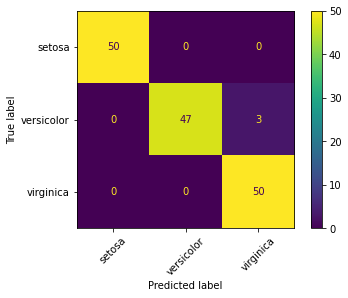

In [7]:
# We will report the accuracy and confusion matrix (train) from the best performing classifier.
print(f"Accuracy : {round(rf_grid.best_score_,2)*100}%")
predvals = rf_grid.best_estimator_.predict(X)
acc = accuracy_score(predvals, y)
cm = confusion_matrix(y, predvals, labels=rf_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                display_labels=rf_grid.classes_)
disp.plot()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.show()

Here we can see that the Random Forest Classifier (97% accuracy) performed only marginally better than the SVM classifier (96% accuracy). Note that we also made use of hyperparameter optimization with the Random Forest Classifier, which likely gives it an advantage. 